# MNIST Softmax Estimation

注意：このノートブックはGPUの有無に関わらずPython 3.x および　TensorFlow 2.x（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
2020/02/04: By H.Nishiyama<br>
2021/10/19 追加・変更部分のみ日本語化<br>
2021/11/17 コメント修正<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
*もし、オンラインのCloabシステムを使うなら、オリジナルサイトのコードを使うか、セルを指示通りに修正して下さい。<br>
【オリジナルサイト】https://github.com/enakai00/colab_tfbook

In [1]:
###%tensorflow_version 2.x

####[MSE-01]
Import modules.

In [2]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

####[MSE-02]
Download the MNIST dataset and store into NumPy arrays.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####[MSE-03]
Define a model for the softmax estimation.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [4]:
model = models.Sequential()
model.add(layers.Dense(10, activation='softmax', input_shape=(28*28,),
                       name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
softmax (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


####[MSE-04]
Compile the model using the Adam optimizer, and Cross entroy as a loss function.

In [5]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['acc'])

####[MSE-05]
Train the model. It acheves the 92.7% accuracy for the test dataset.

In [6]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=128, epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.6728 - acc: 0.8342 - val_loss: 0.3807 - val_acc: 0.9031
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3605 - acc: 0.9025 - val_loss: 0.3172 - val_acc: 0.9134
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.3183 - acc: 0.9124 - val_loss: 0.2958 - val_acc: 0.9182
Epoch 4/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.2987 - acc: 0.9173 - val_loss: 0.2829 - val_acc: 0.9217
Epoch 5/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2871 - acc: 0.9201 - val_loss: 0.2764 - val_acc: 0.9227
Epoch 6/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2792 - acc: 0.9219 - val_loss: 0.2751 - val_acc: 0.9230
Epoch 7/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.2735 - acc: 0.9235 - val_loss: 0.

####[MSE-06]
Show examples of the prediction result. Three for correct preditions and three for incorrect predictions.

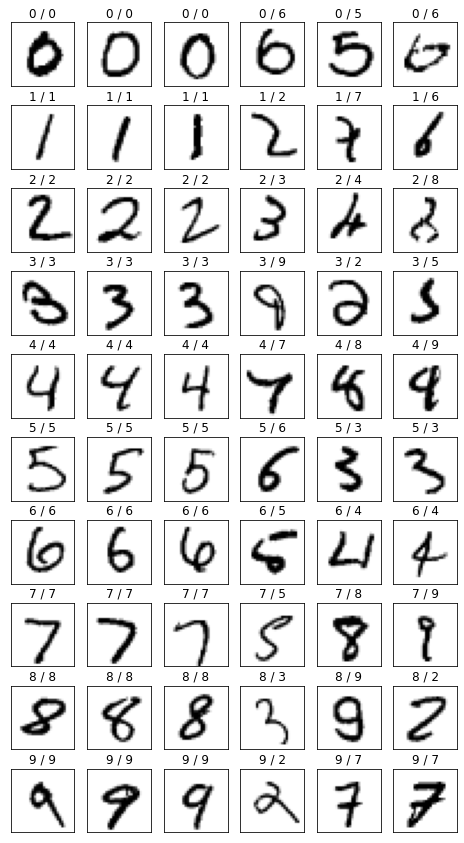

In [7]:
p_val = model.predict(np.array(test_images))
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
    indices = list(correct[correct['pred']==i].index[:3]) \
                + list(incorrect[incorrect['pred']==i].index[:3])
    for c, image in enumerate(test_images[indices]):
        subplot = fig.add_subplot(10, 6, i*6+c+1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
        subplot.imshow(image.reshape((28, 28)),
                       vmin=0, vmax=1, cmap=plt.cm.gray_r)